Back propagation is one of most fundamental element of deep learning. So having cristal clear understanding is mandatory here. Today we are going to implement back prop from scratch. To understand to the underhood of back propagation lets consider a very simple neural network. where we have only 2 input, 1 hidden layer consisting of 2 neuron and 2 output.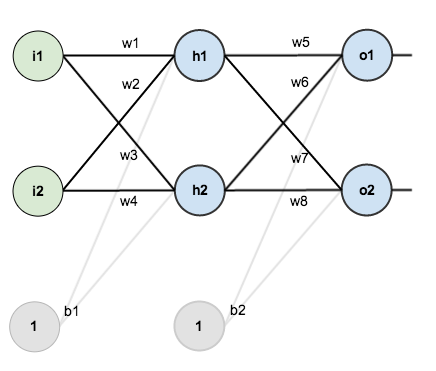
[image source](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)

From our NN for 2 given input we will expect some output. Here we will initialize the weights and biases of our neural net randomly. So our goal will be optimize those weights so that we can get less error.

Training a neural net consist of few basic steps. Forward pass, calculate the error, backward pass, adjust weights and repeat. 
Lets initialize the imput, output, weights and biases.
First we need to import out only dependency: numpy

In [1]:
import numpy as np

Lets call out inputs i1 and i2, 
hidden layer weights w1,w2,w3,w4, 
output layer weights w5, w6, w7, w8, 
biases b1 and b2
outputs o1 and o2.
For input matrix x we are expecting matrix y. We are gonna initialize them. We can initialize our weights and biases randomly. But simplycily and same error lets declare them hardcoded for now.

In [5]:
x = np.array([[.15],
              [.85]])
y = np.array([[.95],
              [.25]])

epochs = 500
layer0 = np.array([[.1, .2],
                   [.3, .4]])
layer1 = np.array([[.5, .6],
                   [.7, .8]])
b1 = .35
b2 = .60

For our activation function we gonna use Sigmoid. Which is $$ x = \frac{1}{(1 + e^{-1})} $$
And the derivative of Sigmoid is $$ x` = x * (1 - x) $$
Lets declare it.

In [6]:
def sigmoid(x, deriv=False):
    if (deriv):
        return x * (1 - x)

    return 1 / (1 + np.exp(-x))

# Forward pass
In forward pass in each layer we will calculate the result, go through an activation function and pass the output to next layer. Lets see how we gonna calculate result.
What will be the out put of h1?<br>
We all know the equation of calculating output of a neuron, which is $$ y = wx + b $$
Here y is the output, w is the weight, x is the input and b is bias.
So $$ h1_{total} = (w1 * i1) + (w2 * i2) + b1 $$
Same as
$$ h2_{total} = (w3 * i1) + (w4 * i2) + b1 $$
Now we need to pass through our activation function. What will be the output from h1?<br>
$$ h1_{out} = \frac{1}{(1 + e^{-h1_{total}})} $$
Same as 
$$ h2_{out} = \frac{1}{(1 + e^{-h2_{total}})} $$
Now we out from out hidden layer. Lets pass them to our output layer and calcute.
As we've seen earlier:
Lets implement them.
$$ o1_{total} = (w5 * h1_{out}) + (w6 * h2_{out}) + b2 $$
Same as
$$ o2_{total} = (w7 * h1_{out}) + (w8 * h2_{out}) + b2 $$
Then
$$ o1_{out} = \frac{1}{(1 + e^{-o1_{total}})} $$
$$ o2_{out} = \frac{1}{(1 + e^{-o2_{total}})} $$

Enough jargon, lets implements this in just 3 lines code.

In [14]:
def forward():
    global l0
    l0 = x # input layer
    l1 = nonlin(np.dot(syn0, l0) + b1) # hidden layer
    l2 = nonlin(np.dot(syn1, l1) + b2) # output layer

As we've got our final output lets calculte the error by MSE(mean squared error)
$$ MSE = \frac{1}{n}\int_{i=1}^{n}(Y_i - Y_i`)^2$$

In [8]:
def MSE():
    return np.square(np.subtract(y, l2)).mean()

# Backward pass

Now we will go to backward direction to update our weights. So lets start from w5. How mucu will error change if we change w5 a bit? Thats mean what is $$ \frac{∂E}{∂w5} $$
From the [chain rule](https://en.wikipedia.org/wiki/Chain_rule):
$$ \frac{∂E}{∂w5} = \frac{∂E}{∂o1_{out}} * \frac{∂o1_{out}}{∂o1_{total}} * \frac{∂o1_{total}}{∂w5} $$
First we need to find $$\frac{∂E}{∂o1_{out}}$$
$$ E = \frac{1}{2}((y_1 - o1_{out})^2 + (y_2 - o2_{out})^2) $$
$$ \frac{∂E}{∂o1_{out}} = o1_{out} - y_1 \text {or we can say it as our error delta} $$
Now what is $$\frac{∂o1_{out}}{∂o1_{total}}$$
Well this is just the derivative of our activation function. So:
$$ \frac{∂o1_{out}}{∂o1_{total}} = o1_{out}*(1 - o1_{out}) $$
Then what is value of $$\frac{∂o1_{total}}{∂w5}$$
We know $$ o1_{total} = (w5 * h1_{out}) + (w6 * h2_{out}) + b2 $$
$$\frac{∂o1_{total}}{∂w5} = h1_{out}$$
Finally
$$ \frac{∂E}{∂w5} = (o1_{out} - y_1) * (o1_{total}*(1 - o1_{total})) * h1_{out} $$
Following this equation we can solve the deltas of the weights of our output layer.
Now we need find deltas for the weights of our hidden layer.
Lets say h1. So what will be $$\frac{∂E}{∂w1}$$
$$\frac{∂E}{∂w1} = \frac{∂E}{∂h1_{out}} * \frac{∂h1_{out}}{∂h1_{total}} * \frac{∂h1_{total}}{∂w1} $$
Lets find out these 3 derivatives.
One very important thing to notice here from neuron h1 we have 2 connection to 2 output as well as 2 error(though we have already calculated our error all togather)
That means:
$$ \frac{∂E}{∂h1_{out}} = ((\frac{∂E}{∂w5} * w5) + (\frac{∂E}{∂w7} * w7) $$
Then $$ \frac{∂h1_{out}}{∂h1_{total}} = h1_{out} * (1 - h1_{out})$$
and $$ \frac{∂h1_{total}}{∂w1} = i1$$
Lets implement this.

In [9]:
def backward():
    global 
    error_delta = l2 - y
    l2_delta = l1 * error_delta * nonlin(l2, True)
    l1_error = l2_delta * layer1
    l1_delta = l0 * l1_error * nonlin(l1, True)
    return l1_delta, l2_delta

We've got out deltas, now lets update the weight.
Wait!
Dont forget about the learning rate.

In [10]:
lr = .5 

In [12]:
l1_delta, l2_delta = backward()
layer1 -= (l2_delta * lr)
layer0 -= (l1_delta * lr)

NameError: name 'l2' is not defined